# Исследование определяющих популярность критериев компьютерных игр

**Цель исследования:** Выявить определяющие успешность игры закономерности. Они позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Исходные данные:** Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. В датасете представлены данные до 2016 года включительно. *Предполагается, что анализ производится на 2017 год.*

- `name` — название игры
- `platform` — платформа
- `year_of_Release` — год выпуска
- `genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `other_sales` — продажи в других странах (миллионы проданных копий)
- `critic_Score` — оценка критиков (максимум 100)
- `user_Score` — оценка пользователей (максимум 10)
- `rating` — рейтинг от организации ESRB (возрастная категория)

**Содержание:**
* [1. Первичный обзор данных](#1-Первичный-обзор-данных)
* [2. Переработка данных](#2-Переработка-данных)
    * [2.1 Замена названий столбцов](#2.1-Приведение-названий-столбцов-к-змеиному-регистру)
    * [2.2 Изменение типов данных](#2.2-Изменение-типов-данных)
    * [2.3 Работа с дубликатами](#2.3-Работа-с-дубликатами)
    * [2.4 Добавление новых столбцов](#2.4-Добавление-новых-столбцов)
    * [2.5 Заполнение пропусков](#2.5-Заполнение-пропусков)
* [3. Исследовательский анализ данных](#3-Исследовательский-анализ-данных)
    * [3.1 Количество релизов по годам](#3.1-Исследование-количества-релизов-по-годам)
    * [3.2 Популярность платформ](#3.2-Исследование-популярности-платформ)
    * [3.3 Влияние оценок игроков и критиков](#3.3-Исследование-влияния-отзывов-пользователей-и-критиков-на-продажи)
    * [3.4 Жанровые предпочтения](#3.4-Исследование-жанровых-предпочтений)
* [4. Портреты пользователя каждого региона](#4-Составление-портрета-пользователя-каждого-региона)
    * [4.1 Северная Америка](#4.1-Исследование-региона-Северная-Америка-(NA))
    * [4.2 Европа](#4.2-Исследование-региона-Европа-(EU))
    * [4.3 Япония](#4.3-Исследование-региона-Япония-(JP))
* [5. Проверка гипотез](#5-Проверка-гипотез)
* [Выводы по работе](#Общие-выводы)

## 1 Первичный обзор данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
print (pd.__version__)

1.4.2


In [4]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

#df = pd.read_csv('/datasets/games.csv')

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


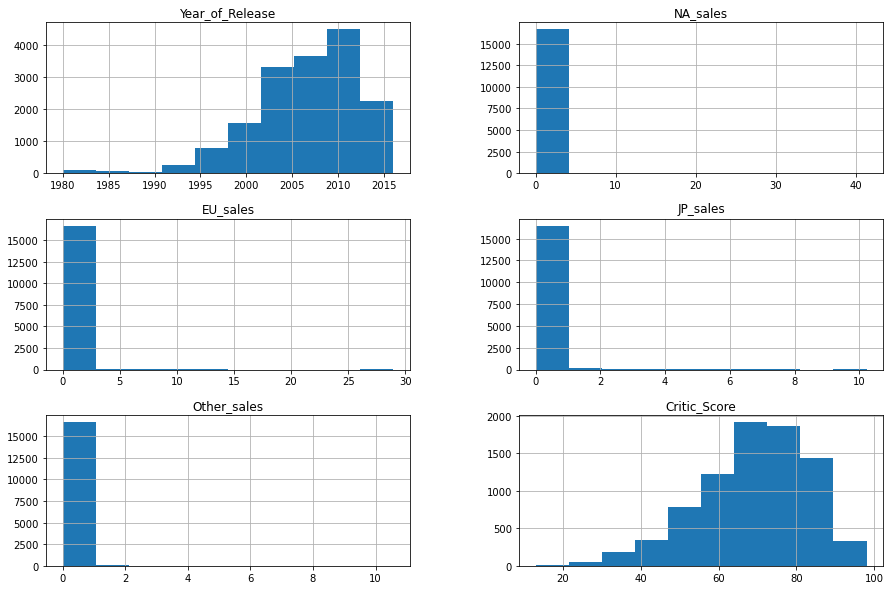

In [6]:
df.hist(figsize = (15, 10));

**Промежуточные итоги:** Датафрейм содержит 11 столбцов, 16715 строк. В нем представлены данные о годе релиза игры, её продажах в разных регионах, а также оценки критиков. На гистограммах продаж большинство значений сосредоточены в начале координат: остальные могут быть как выбросами, так и данными о крайне успешных играх. Прежде чем приступить к исследовательскому анализу, данные необходимо переработать.

## 2 Переработка данных

На этапе первичного обзора данных было выявлено:
- названия столбцов не соответствуют змеиному регистру 
- в столбцах `Year_of_Release` и `User_Score` неверный тип данных
- в данных содержатся пропуски
- данные о продажах могут содержать выбросы
- возможно, столбцы `Platform` и `Genre` могут содержать неявные дубликаты?

### 2.1 Приведение названий столбцов к змеиному регистру

In [7]:
df.columns = ['name', 'platform', 'year_of_release', 'genr', 'NA_sales', 
              'EU_sales', 'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

### 2.2 Изменение типов данных

In [8]:
df['user_score'].unique()
df.query('user_score == "tbd"').shape[0]

# tbd - to be determined, то есть рейтинг пока не определён, значит, это фактически NaN

df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'].unique()
df['user_score'] = df['user_score'].astype('float')

df.query('year_of_release.isna()').head(20)

# у всех игр без указанного года выпуска очень низкие продажи, значит, 
# эти строки не так важны для анализа и их можно удалить

data = df.dropna(subset = ['year_of_release', 'name', 'genr'])
data['year_of_release'] = data['year_of_release'].astype('int32')

C:\Users\User\AppData\Local\Temp\ipykernel_14500\696811610.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data['year_of_release'].astype('int32')


### 2.3 Работа с дубликатами

In [8]:
data.duplicated().sum()

0

In [9]:
print('Платформы: ', data['platform'].unique(), '\n')
print('Жанры: ', data['genr'].unique())

Платформы:  ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 

Жанры:  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


Можно сделать вывод, что данные не содержат явных и неявных дубликатов.

### 2.4 Добавление новых столбцов

In [10]:
data['all_sales'] = data[['NA_sales','EU_sales','JP_sales', 'other_sales']].sum(axis = 1)
data.head()

/tmp/ipykernel_48/2024960283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['all_sales'] = data[['NA_sales','EU_sales','JP_sales', 'other_sales']].sum(axis = 1)


,name,platform,year_of_release,genr,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### 2.5 Заполнение пропусков

Пропуски встречаются в столбцах `critic_score`, `user_score`, `rating`. Последний столбец заполнить никак нельзя - возрастной рейтинг невозможно вывести из имеющихся данных. Проверим корреляцию между продажами и оценками игры у критиков и пользователей, есть вероятность, что чем выше продажи, тем лучше оценки у игры.

In [11]:
print('Корреляция между продажами в Европе и оценками критиков:', data['EU_sales'].corr(data['critic_score']))
print('Корреляция между продажами в Европе и оценками игроков:', data['EU_sales'].corr(data['user_score']))
print('Корреляция между оценками игроков и оценками критиков:', data['critic_score'].corr(data['user_score']))

Корреляция между продажами в Европе и оценками критиков: 0.22127568477452472
Корреляция между продажами в Европе и оценками игроков: 0.05552985477192151
Корреляция между оценками игроков и оценками критиков: 0.5796706281932219


Средний год выпуска игры, не имеющей оценок критиков: 2006.0


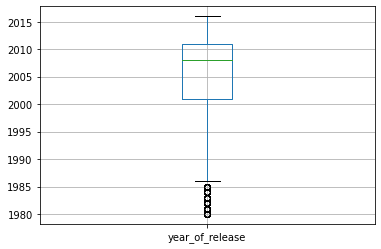

In [12]:
print('Средний год выпуска игры, не имеющей оценок критиков:', 
      data.query('critic_score.isna()')['year_of_release'].mean().round())
data.query('critic_score.isna()').boxplot(['year_of_release']);

Средний год выпуска игры, не имеющей оценок пользователей: 2005.0


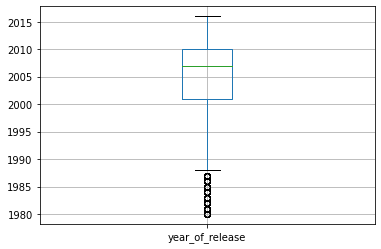

In [13]:
print('Средний год выпуска игры, не имеющей оценок пользователей:', 
      data.query('user_score.isna()')['year_of_release'].mean().round())
data.query('user_score.isna()').boxplot(['year_of_release']);

Получается, что оценки игроков и критиков имеют слабую положительную корреляцию с продажами в отдельном регионе. По уровню продаж не получится судить о рейтинге игры среди критиков и пользователей, а значит заполнить таким образом пропуски не получится. Посмотрим, как обстоят дела в столбце `rating`: в нем содержится информация о возрастных ограничесниях, накладываемых компанией ESRB. 

In [14]:
print('Всего пропусков:', data.query('rating.isna()').shape[0])
print('Пропусков, где суммарные продажи превышают 1 млн проданных копий:'
      , data.query('rating.isna() and all_sales > 1').shape[0])
print('Из них до 1994 вышло:', data.query('rating.isna() and year_of_release < 1994 and all_sales > 1').shape[0])

#data.query('rating.isna() and year_of_release >= 1994 and all_sales > 1').head(20)

Всего пропусков: 6676
Пропусков, где суммарные продажи превышают 1 млн проданных копий: 629
Из них до 1994 вышло: 153


Получается, что большинство игр без присвоенного рейтинга либо имеют малое число продаж (возможно, именно из-за этого? / может быть, они выпускаются локально для регионов без данной системы рейтингов?), либо вышли до создания данной системы рейтингов. Поэтому, заполним пропуски заглушной missed.

In [15]:
data.loc[df['rating'].isna(), 'rating'] = 'missed'

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


**Промежуточные итоги:** в ходе переработки данных были приведены к общему виду названия столбцов, добавлены данные о суммарных продажа во всех регионах. Изменены типы данных в `user_score` и `year_of_release`. Датасет проверен на наличие дубликатов, их не было обнаружено. Пропуски в столбцах  `critic_score`, `user_score`, были оставлены, так как информации, на основе которой их можно было бы заполнить, нет.

In [16]:
print(f'После переработки объем данных составил {data.shape[0]/df.shape[0]: .02%} от изначального.')

После переработки объем данных составил  98.38% от изначального.


In [17]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genr', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genr             16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## 3 Исследовательский анализ данных

### 3.1 Исследование количества релизов по годам

Датасет охватывает временной промежуток с 1980 по 2016 год включительно. Можно наблюдать увеличение выпусков игр после 1995 года, а также резкие скачки в 2001 (в сторону увеличения) и в 2011 (количество релизов резко упало). Пик приходится на период с 2007 на 2008 годы: тогда количество релизов достигало 1400 игр в год. В среднем в датасете игры были выпущены в 2006-2007 году.

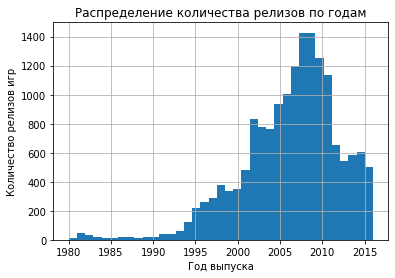

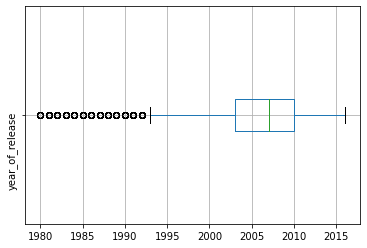

In [18]:
year_bins = data['year_of_release'].max() - data['year_of_release'].min() + 1
data['year_of_release'].hist(bins = year_bins);
plt.title('Распределение количества релизов по годам')
plt.ylabel('Количество релизов игр')
plt.xlabel('Год выпуска')
plt.show()
data.boxplot(['year_of_release'], rot = 90, vert = False);
#data['year_of_release'].describe()

### 3.2 Исследование популярности платформ

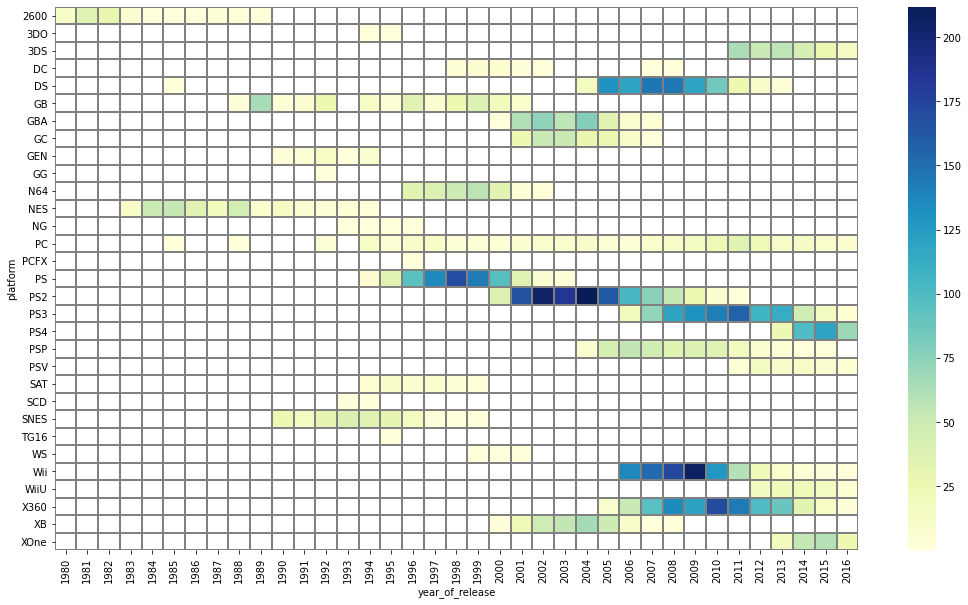

In [19]:
#data_platform = data.groupby(['platform', 'year_of_release'])['name'].count()
data_platform = data.pivot_table(index  = 'platform', columns = 'year_of_release', values = 'all_sales', aggfunc = 'sum')
plt.figure(figsize = (18, 10))
sns.heatmap(data_platform, annot=False, linewidths=1, linecolor='grey', cmap="YlGnBu");

In [20]:
# удаление выброса для платформы DS

data = data.query('~((platform == "DS") and (year_of_release == 1985))')

Посмотрим, как менялись продажи по платформам: как видно по heatmap, по продажам лидируют PS2, X360, PS3, Wii и DS, однако к текущему году продажи по ним сильно упали или их уже нет совсем. Средняя продолжительность "жизни" платформы, согласно подсчетам, составляет 6 лет.

In [21]:
platform_sales = (
    data
    .groupby('platform')['all_sales'].sum()
    .sort_values(ascending = False)
)

platform_sales.head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: all_sales, dtype: float64

In [22]:
array = []
for column in data_platform.columns:
    i = len(data_platform[column].unique()) - 1
    array.append(i)

print(f'Средняя продолжительность "жизни" платформы {np.mean(array).round(2)} лет.')

Средняя продолжительность "жизни" платформы 6.43 лет.


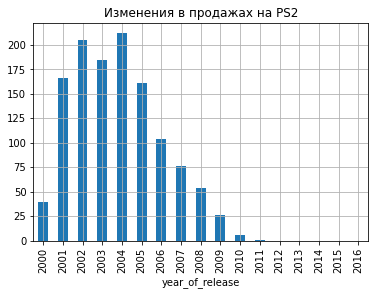

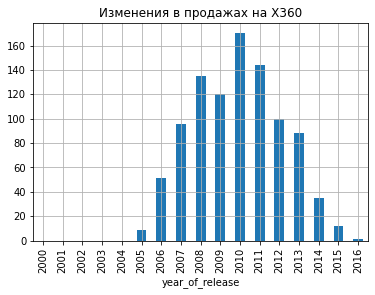

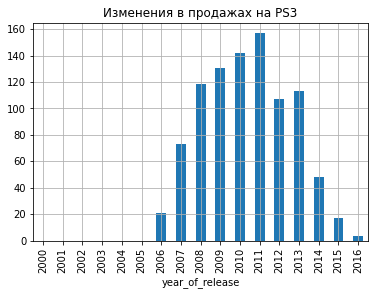

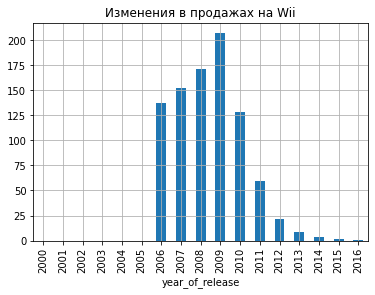

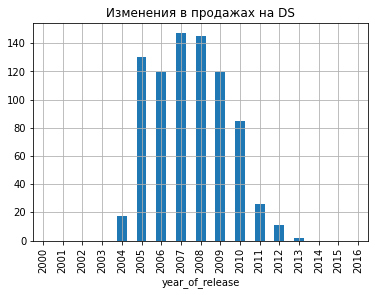

In [23]:
data_platform = data.pivot_table(index  = 'year_of_release', columns = 'platform', 
                                 values = 'all_sales', aggfunc = 'sum')

top_5_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

for platform in top_5_platforms:
    data_platform[platform][data_platform.index>=2000].plot(kind='bar', grid = True, title = 'Изменения в продажах на ' + platform)
    plt.show()

In [24]:
data_actual = data.query('year_of_release > 2011')

print(f'Доля данных за актуальный период в 5 лет составила {data_actual.shape[0]/data.shape[0]:.02%} от исходных.')

Доля данных за актуальный период в 5 лет составила 17.55% от исходных.


Как видно по "ящику с усами" для актуального периода, практически у всех платформ много игр, выходящих за "усы" ящика. Это не выбросы, а примеры крайне успешных продуктов. Самыми перспективными можно считать платформы PS4, WiiU и XOne. Сюда попадают и PS3 и X360, которые лидируют по медианным значениям, однако стоит учитывать, что у них есть уже новое поколение консолей. К перспективным можно отнести и PC, который уже очень долго существует на рынке и демонстрирует стабильные продажи.

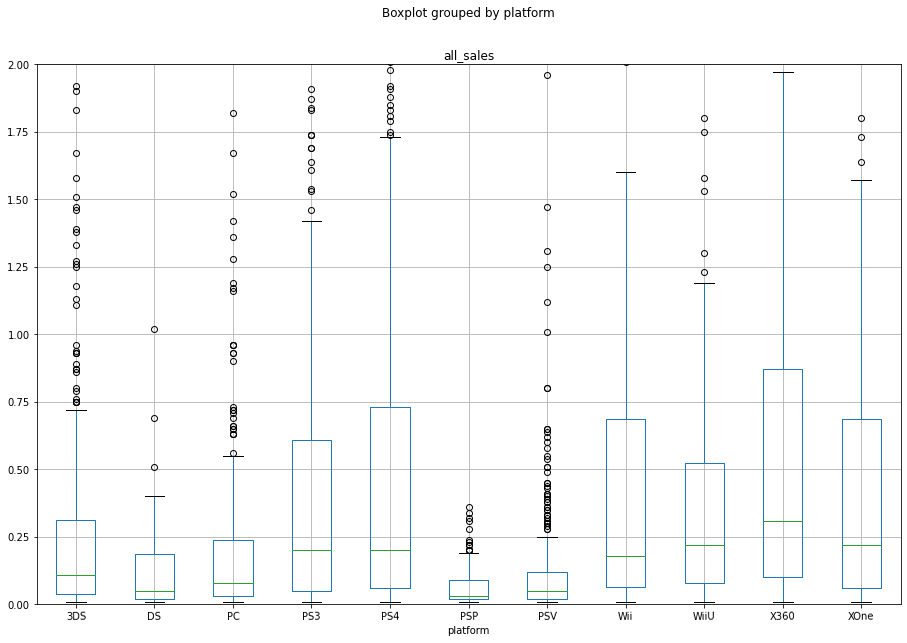

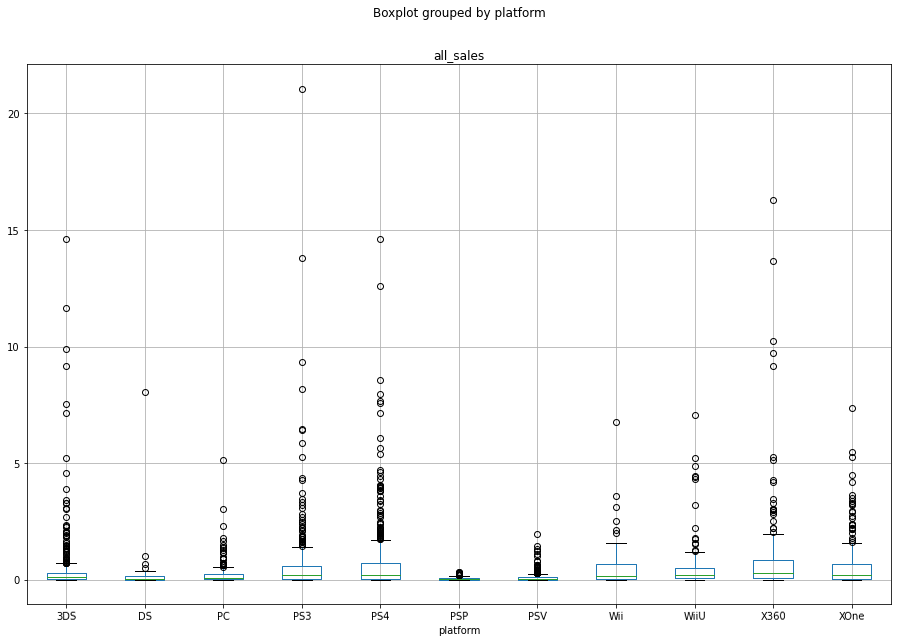

In [25]:
data_actual.boxplot(by = 'platform', column = 'all_sales', rot = 1, figsize = (15,10))
plt.ylim(0,2)
data_actual.boxplot(by = 'platform', column = 'all_sales', rot = 1, figsize = (15,10));

**Промежуточные итоги:** Платформы появляются и исчезают в среднем за 6-7 лет. Самой стабильной платформой является PC: пускай у него и не самые высокие продажи, однако он существует на рынке дольше всех, как видно по heatmap, и вряд ли с него уйдёт. 

Самыми прибыльными являются *PS2, X360, PS3, Wii и DS*, однако, согласно продажам за последние несколько лет, они уже не на пике своей популярности. Относительно новыми  и перспективными можно считать такие платформы, как *PS4, WiiU и XOne*. Стоит обратить внимание, что большинство из этих платформ являются преемниками более старых своих версий, а значит переход на них произойдет постепенно и не следует ждать высоких продаж в первые несколько лет. Эту же тенденцию демонстрировали и PS2, которая пришла вместо PS, и X360 после XB. 

Далее в работе будут использоваться данные **за последние 5 лет**: именно такой перио можно считать актуальным, ведь тенденции на рынке игр меняются очень быстро.

### 3.3 Исследование влияния отзывов пользователей и критиков на продажи

Проверим, как влияют на продажи отзывы пользователей и критиков. Для анализа возьмем наиболее популярные и прибыльные платформы: PS3, PS4, WiiU, XOne, X360 и PC, сравним их показатели корреляции между собой и со всеми платформами сразу.

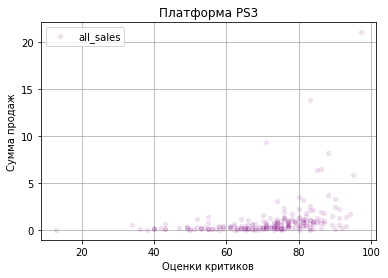

Корреляция для PS3 составляет: 0.331


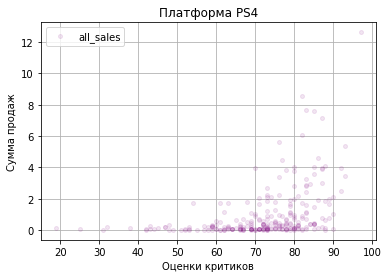

Корреляция для PS4 составляет: 0.407


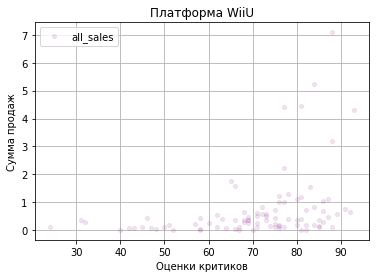

Корреляция для WiiU составляет: 0.348


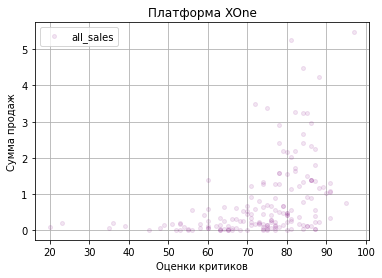

Корреляция для XOne составляет: 0.417


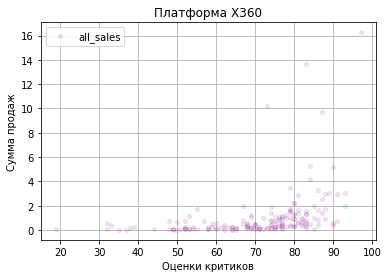

Корреляция для X360 составляет: 0.361


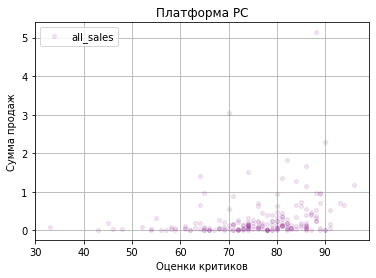

Корреляция для PC составляет: 0.237


In [26]:
platforms_for_comp = ['PS3', 'PS4', 'WiiU', 'XOne', 'X360', 'PC']

for platform in platforms_for_comp:
    new_df = data_actual.query('platform == @platform')
    new_df.plot(x = 'critic_score', y = 'all_sales', linestyle = '', marker = 'o', 
              markersize = 4, alpha = 0.1, color = 'purple', grid = True); 
    plt.title('Платформа ' + platform)
    plt.xlabel('Оценки критиков')
    plt.ylabel('Сумма продаж')
    plt.show()
    print(f'Корреляция для {platform} составляет:', (new_df['critic_score'].corr(new_df['all_sales']).round(3)))

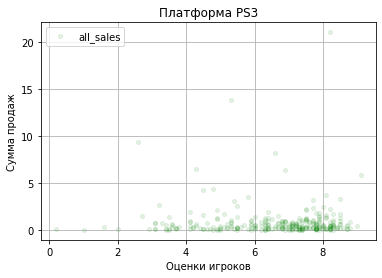

Корреляция для PS3 составляет: -0.005


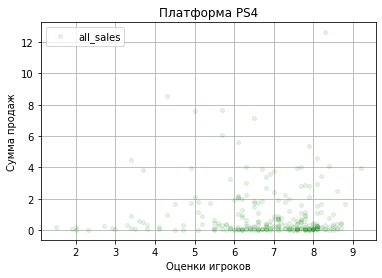

Корреляция для PS4 составляет: -0.032


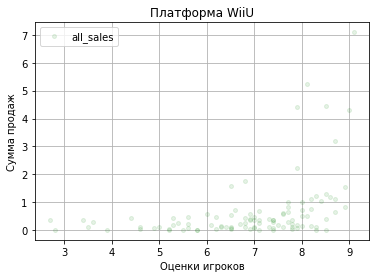

Корреляция для WiiU составляет: 0.4


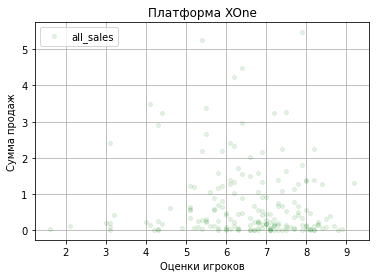

Корреляция для XOne составляет: -0.069


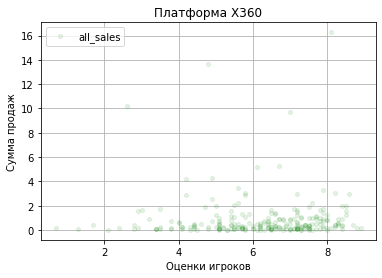

Корреляция для X360 составляет: 0.006


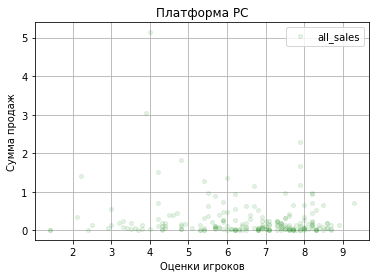

Корреляция для PC составляет: -0.122


In [27]:
for platform in platforms_for_comp:
    new_df = data_actual.query('platform == @platform')
    new_df.plot(x = 'user_score', y = 'all_sales', linestyle = '', marker = 'o', 
              markersize = 4, alpha = 0.1, color = 'green', grid = True); 
    plt.title('Платформа ' + platform)
    plt.xlabel('Оценки игроков')
    plt.ylabel('Сумма продаж')
    plt.show()
    print(f'Корреляция для {platform} составляет:', (new_df['user_score'].corr(new_df['all_sales']).round(3)))

Корреляция между отзывами критиков и продажами по всем платформам составляет: 0.308
Корреляция между отзывами игроков и продажами по всем платформам составляет: 0.004


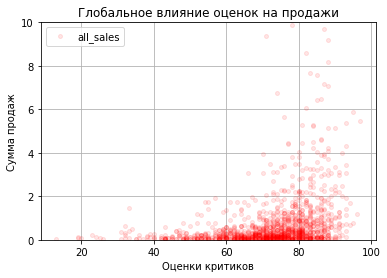

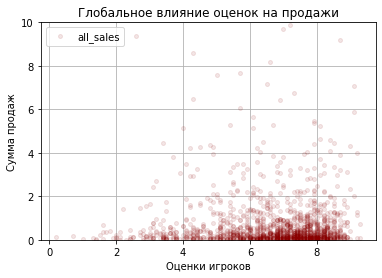

In [28]:
print('Корреляция между отзывами критиков и продажами по всем платформам составляет:', 
      (data_actual['critic_score'].corr(data_actual['all_sales']).round(3)))
print('Корреляция между отзывами игроков и продажами по всем платформам составляет:', 
      (data_actual['user_score'].corr(data_actual['all_sales']).round(3)))

data_actual.plot(x = 'critic_score', y = 'all_sales', linestyle = '', marker = 'o', 
              markersize = 4, alpha = 0.1, color = 'red', grid = True); 
plt.ylim(0, 10)
plt.title('Глобальное влияние оценок на продажи')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж');

data_actual.plot(x = 'user_score', y = 'all_sales', linestyle = '', marker = 'o', 
              markersize = 4, alpha = 0.1, color = 'darkred', grid = True); 
plt.ylim(0, 10)
plt.title('Глобальное влияние оценок на продажи')
plt.xlabel('Оценки игроков')
plt.ylabel('Сумма продаж');

**Промежуточные итоги:** в качетсве платформ для анализа были вабраны PS3, PS4, WiiU, XOne, X360 и PC. Между оценками критиков и общими продажами существует прямая корреляция, оценки критиков гораздо в большей степени влияют на продажи (например, коэф. корреляции 0.4 для PS4), чем оценки пользователей (корреляции почти нет, -0.032). Но есть и исключения: так, у WiiU коэф. корреляции между продажами и оценками игроков составляет 0.4, он даже больше, чем у оценок критиков. Можно сделать вывод, что в целом оценки критиков более объективны, чем у пользователей.

### 3.4 Исследование жанровых предпочтений

In [29]:
data_genr = (
    data_actual 
    .pivot_table(index = 'genr', values = 'all_sales', aggfunc = ['count', 'sum'])
)

data_genr.columns = ['count', 'sum_sales']

#display(data_genr.sort_values(by = 'count', ascending = False).head())
#display(data_genr.sort_values(by = 'sum_sales', ascending = False).head())

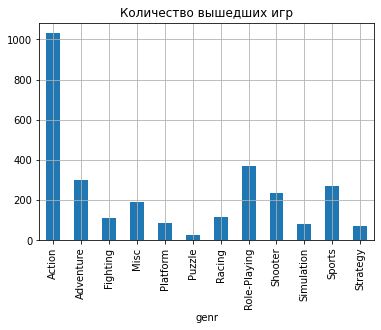

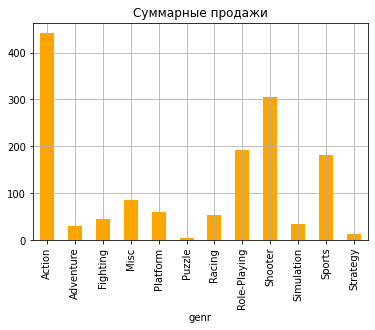

In [30]:
data_genr['count'].plot.bar(grid = True, title = 'Количество вышедших игр');
plt.show()
data_genr['sum_sales'].plot.bar(color = 'orange', grid = True, title = 'Суммарные продажи');

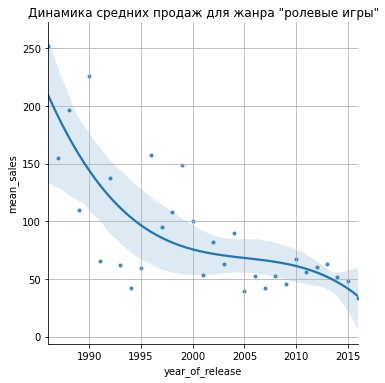

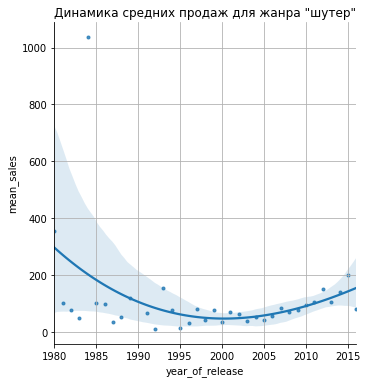

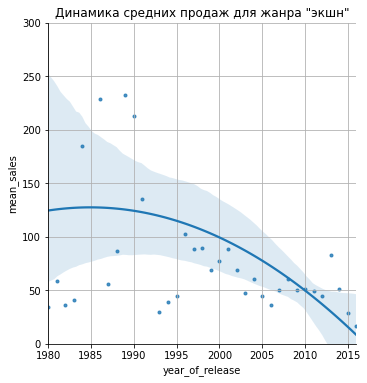

In [31]:
genr_dynamic = data.groupby(['genr', 'year_of_release']).agg({'all_sales': ['count', 'sum']}).reset_index()
genr_dynamic.columns = ['genr', 'year_of_release','count', 'sales_sum']
genr_dynamic['mean_sales'] = genr_dynamic['sales_sum'] / genr_dynamic['count']*100

sns.lmplot(data = genr_dynamic.query('genr == "Role-Playing"'), 
           x = 'year_of_release', y = 'mean_sales', order=3,  markers='.')
plt.grid(visible = True)
plt.title('Динамика средних продаж для жанра "ролевые игры"')

sns.lmplot(data = genr_dynamic.query('genr == "Shooter"'), 
           x = 'year_of_release', y = 'mean_sales', order=3,  markers='.')
plt.grid(visible = True)
#plt.xlim(2005, 2016)
plt.title('Динамика средних продаж для жанра "шутер"');

sns.lmplot(data = genr_dynamic.query('genr == "Action"'), 
           x = 'year_of_release', y = 'mean_sales', order=2,  markers='.')
plt.grid(visible = True)
plt.ylim(0, 300)
#plt.xlim(2005, 2016)
plt.title('Динамика средних продаж для жанра "экшн"');

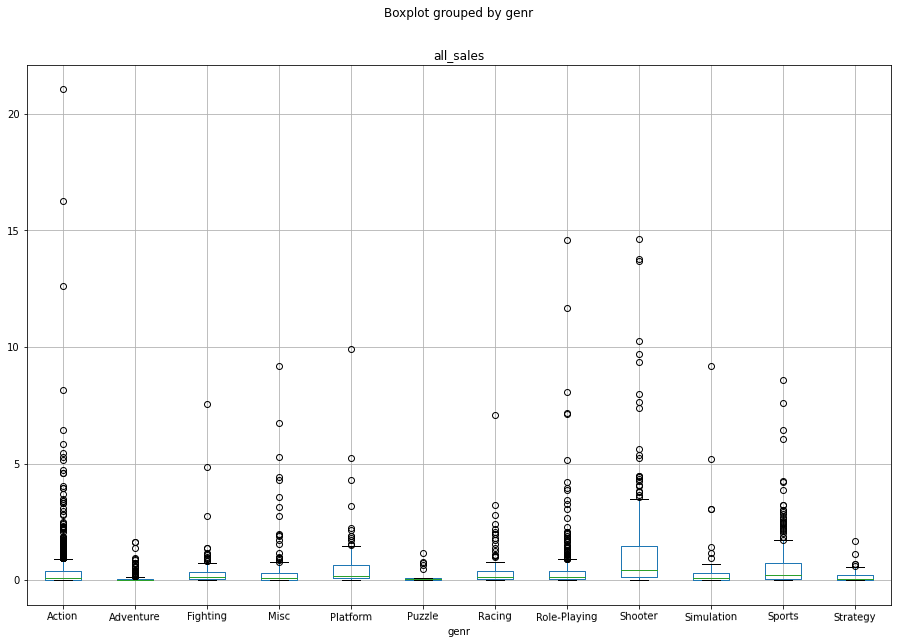

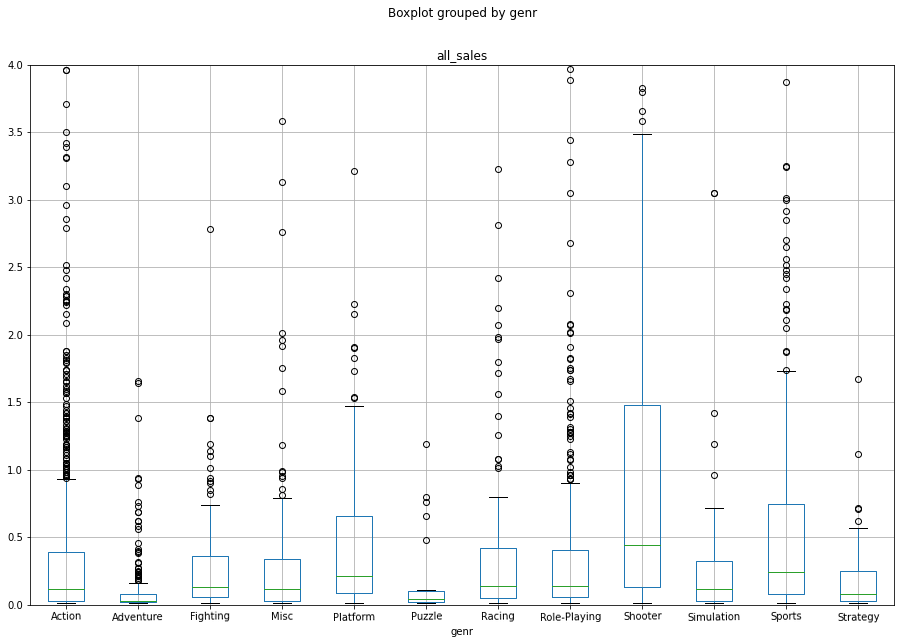

In [32]:
data_actual.boxplot(by = 'genr', column = 'all_sales', rot = 1, figsize = (15,10))
data_actual.boxplot(by = 'genr', column = 'all_sales', rot = 1, figsize = (15,10))
plt.ylim(0, 4);

**Промежуточные итоги:** по количеству выпущенных игр, так и по суммарным продажам во всех регионах лидирует жанр "экшн". Однако стоит заметить, что такие суммарные продажи могут быть связаны как раз с количством игр, а не с их качеством и продажами отдельно взятого продукта. Более того, динамика средних продаж по одной одной игре за актуальный период у экшна отрицательная. Аналогичное демонстрирует и диаграмма размаха: как по ней видно, медиана всех продаж больше всего у жанров "шутер", "спорт" и "платформер". Не стоит забывать и про выбросы - они демонстрируют примеры крайне успешных игр. Например, в жанрах экшн, ролевые игры и шутер есть продукты, суммарные продажи которых превысили 10 млн копий.

## 4 Составление портрета пользователя каждого региона

### 4.1 Исследование региона Северная Америка (NA)

Пользователь данного региона в большей степени предпочитает *Xbox360*, далее по прибыльности идут *PS3, PS4, XOne и 3DS*. Примечательно, что PS4 обошла Xbox One по продажам, ведь предыдущие поколения консолей демонстрировали обратное. Самыми популярными жанрами являются *экшн, шутеры, спорт, музыка и ролевые игры*, а возрастным рейтингом - *M и Е*.

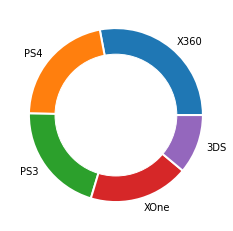

In [33]:
na_platform = (
    data_actual.groupby('platform')['NA_sales'].sum()
    .sort_values(ascending = False)
    .head()
)
#plt.figure(figsize = (10, 10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(na_platform, labels = na_platform.index, wedgeprops = { 'linewidth':2, 'edgecolor':'white'})
p = plt.gcf()
p.gca().add_artist(my_circle);

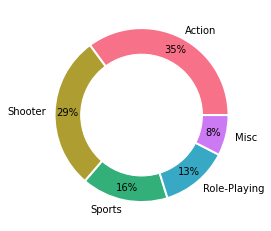

In [34]:
na_genr = (
    data_actual.groupby('genr')['NA_sales'].sum()
    .sort_values(ascending = False)
    .head()
)
#plt.figure(figsize = (10, 10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(na_genr, labels = na_genr.index, wedgeprops = { 'linewidth':2, 'edgecolor':'white'}, 
        colors = sns.color_palette("husl", 5), autopct='%1.0f%%', pctdistance=0.85)
p = plt.gcf()
p.gca().add_artist(my_circle);

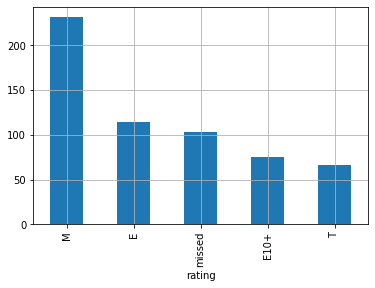

In [35]:
na_rating = (
    data_actual.groupby('rating')['NA_sales'].sum()
    .sort_values(ascending = False)
)
na_rating.plot.bar(grid = True);

### 4.2 Исследование региона Европа (EU)

Европейцы, в отличие от пользователей из Северной Америки, больше предпочитают PlayStation, а не Xbox. PS3 и PS4 занимают 1 и 2 место по продажам в регионе, а уже за ними идут X360, XOne и 3DS. Жанровые и возрастные предпочтения практически такие же, как и в NA, только вместо музыки игроки предпочитают гонки.

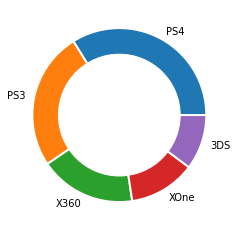

In [36]:
eu_platform = (
    data_actual.groupby('platform')['EU_sales'].sum()
    .sort_values(ascending = False)
    .head()
)
#plt.figure(figsize = (10, 10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(eu_platform, labels = eu_platform.index, wedgeprops = { 'linewidth':2, 'edgecolor':'white'})
p = plt.gcf()
p.gca().add_artist(my_circle);

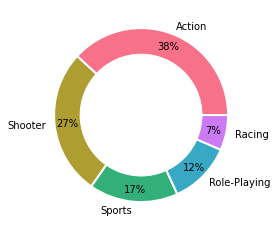

In [37]:
eu_genr = (
    data_actual.groupby('genr')['EU_sales'].sum()
    .sort_values(ascending = False)
    .head()
)
#plt.figure(figsize = (10, 10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(eu_genr, labels = eu_genr.index, wedgeprops = { 'linewidth':2, 'edgecolor':'white'}, 
        colors = sns.color_palette("husl", 5), autopct='%1.0f%%', pctdistance=0.85)
p = plt.gcf()
p.gca().add_artist(my_circle);

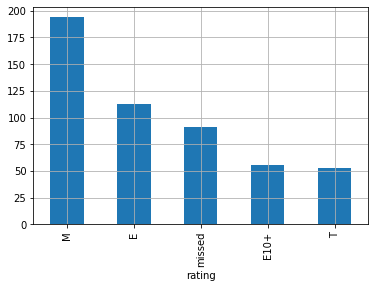

In [38]:
eu_rating = (
    data_actual.groupby('rating')['EU_sales'].sum()
    .sort_values(ascending = False)
)
eu_rating.plot.bar(grid = True);

### 4.3 Исследование региона Япония (JP)

Япония сильно отличается от предыдущих регионов. Самой популярной платформной является *3DS*, а также *PS3, PSV, PS4 и WiiU*. Xbox же вообще не вошел в топ-5. Жанровые предпочтения тоже отличаются: японцы в большей степени предпочитают *ролевые игры и экшн*, а вот шутеры составляют малую долю продаж. Отсюда, вероятно, и различия в возрастых рейтинах: большая часть из маркированных рейтингом игр предназначена для всех (E), либо для подростков (T). Больше всего игр вообще не имеют рейтинга, то есть скорее всего выходят локально для Японии или Азиатского региона, в то время как ESRB предназначен для маркировки игр для США и Канады.

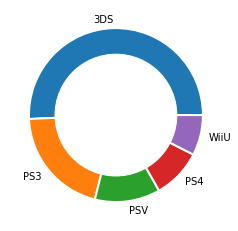

In [39]:
jp_platform = (
    data_actual.groupby('platform')['JP_sales'].sum()
    .sort_values(ascending = False)
    .head()
)
#plt.figure(figsize = (10, 10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(jp_platform, labels = jp_platform.index, wedgeprops = { 'linewidth':2, 'edgecolor':'white' })
p = plt.gcf()
p.gca().add_artist(my_circle);

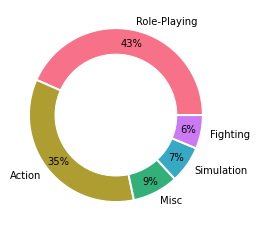

In [40]:
jp_genr = (
    data_actual.groupby('genr')['JP_sales'].sum()
    .sort_values(ascending = False)
    .head()
)
#plt.figure(figsize = (10, 10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(jp_genr, labels = jp_genr.index, wedgeprops = { 'linewidth':2, 'edgecolor':'white'}, 
        colors = sns.color_palette("husl", 5), autopct='%1.0f%%', pctdistance=0.85)
p = plt.gcf()
p.gca().add_artist(my_circle);

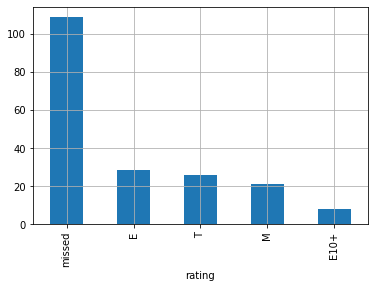

In [41]:
jp_rating = (
    data_actual.groupby('rating')['JP_sales'].sum()
    .sort_values(ascending = False)
)
jp_rating.plot.bar(grid = True);

## 5 Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

```
H_0: Средние пользовательские рейтинги платформы Xbox One = средние пользовательские рейтинги платформы PC
H_а: Средние пользовательские рейтинги платформы Xbox One ≠ средние пользовательские рейтинги платформы PC
alpha = 0.05
```

In [43]:
array_1 = data_actual.loc[data_actual['platform'] == "XOne", 'user_score'].dropna()
array_2 = data_actual.loc[data_actual['platform'] == "PC", 'user_score'].dropna()

alpha = 0.05
result_12 = st.ttest_ind(array_1, array_2)
print('p-значение:', result_12.pvalue)

if alpha > result_12.pvalue:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


In [44]:
print('Средние пользовательские рейтиги для XOne:', array_1.mean().round(2))
print('Средние пользовательские рейтиги для PC:', array_2.mean().round(2))

Средние пользовательские рейтиги для XOne: 6.52
Средние пользовательские рейтиги для PC: 6.43


**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

```
H_0: Средние пользовательские рейтинги жанра Action = средние пользовательские рейтинги жанра Sports
H_a: Средние пользовательские рейтинги жанра Action ≠ средние пользовательские рейтинги жанра Sports
alpha = 0.05
```

In [45]:
array_3 = data_actual.loc[data_actual['genr'] == "Action", 'user_score'].dropna()
array_4 = data_actual.loc[data_actual['genr'] == "Sports", 'user_score'].dropna()

alpha = 0.05
result_34 = st.ttest_ind(array_3, array_4)
print('p-значение:', result_34.pvalue)

if alpha > result_34.pvalue:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


In [46]:
print('Средние пользовательские рейтиги для Action:', array_3.mean().round(2))
print('Средние пользовательские рейтиги для Sports:', array_4.mean().round(2))

Средние пользовательские рейтиги для Action: 6.83
Средние пользовательские рейтиги для Sports: 5.46


## Общие выводы

Проанализирован датасет, содержащий данные о годе релиза игры, платформе, её продажах в разных регионах и оценках со стороны игроков и критивов. В ходе переработки данных удалены некоторые пропуски, исправлены названия столбцов и их форматы. После переработки объем данных составил  98.39% от изначального.


1. Датасет охватывает временной промежуток с 1980 по 2016 год включительно. После 1995 года количество выпускаемых игр стало постепенно увеличиваться, также есть резкие скачки в 2001 (в сторону увеличения) и в 2011 (количество релизов резко упало). Пик приходится на период с 2007 на 2008 годы: тогда количество релизов достигало 1400 игр в год. В среднем в датасете игры были выпущены в 2006-2007 году.
  
  
2. **Новые платформы появляются и исчезают в среднем за 6-7**. Самыми прибыльными являются PS2, X360, PS3, Wii и DS, однако, согласно продажам за последние несколько лет, они уже не на пике своей популярности. Относительно **новыми и перспективными можно считать такие платформы, как PS4, WiiU и XOne**. Стоит обратить внимание, что большинство из этих платформ являются преемниками более старых своих версий, а значит переход на них произойдет постепенно и не следует ждать высоких продаж в первые несколько лет. Эту же тенденцию демонстрировали и PS2, которая пришла вместо PS, и X360 после XB.
 
 
3. **В качестве актуального периода для планирования прогнозов на 2017 год были взяты данные за последние 5 лет**: именно такой период можно считать актуальным, ведь тенденции на рынке игр меняются очень быстро.


4. **Жители Европы и Северной Америки больше покупают игры в жанрах экшн, шутер, спорт и ролевые игры**; при этом по продажам выделяются сразу два сегмента: игры для взрослых (M) и игры для любого возраста (E). **Жители Японии не любят шутеры и демонстрируют интерес в первую очередь к ролевым играм и экшну**. Возрастной рейтинг у самых продаваемых игр в данном регионе ниже: больше всего игр для всех (E) и для подростков (T), однако большинство игр вообще не имеют рейтинга. Получается, в восточном сегменте более молодая целевая аудитория.

    Различаются и предпочтения в платформах: в NA лидирует Xbox360, далее по прибыльности идут PS3, PS4, XOne и 3DS; в EU больше предпочитаю Play Station, a не Xbox, PS3 и PS4 занимают первые 2 места по продажам в регионе. Самой популярной платформной в JP является 3DS, далее идут PS3, PSV, PS4 и WiiU. Xbox же вообще не вошел в топ-5.
    
    
5. Таким образом, при выборе жанра (в частности выбором между шутером и ролевой игрой) следует ориентироваться на регион. Не смотря на то, что игры жанра экшн лидируют по продажам, динамика средних продаж по одной одной игре за актуальный период у него отрицательная. Медианные продажи больше всего у жанров "шутер", "спорт" и "платформер". Не стоит забывать и про выбросы - они демонстрируют примеры крайне успешных игр. Например, в жанрах экшн, ролевые игры и шутер есть продукты, суммарные продажи которых превысили 10 млн копий.


6. При проверке гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, при статистическом уровне значимости 5% оснований для её опровержения не было выявлено. Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, не была отвергнута.

**По итогам анализа стоит обратить внимание на платформы *PS4, XOne и 3DS*, а также на жанры "шутер", "экшн", "спорт" и "платформер". При выборе платформы и жанра необходимо учитывать особенности целевого региона.**